<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>Networkx version:</b>  2.x<br/>
<b>Last update:</b> 18/03/2020
</span>

<a id='top'></a>
# *Intro to Networkx*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


**Note 2:** a nice textbook that approaches network analysis using ``networkx`` is: 

<table>
    <tr>
    <td>
         <b>"Complex Network Analysis in Python"</b> <br/> 
         Dmitry Zinoviev, The Pragmatic Programmer. 2018.
     </td>
     <td>
<img width=150px src="img/book.jpg" align="right"/>
        </td>
    </tr>
</table>

**Note 3:** a nice textbook that approaches network analysis theory including python examples is: 

<table>
    <tr>
    <td>
         <b>"Firstcourse in network science"</b> <br/> 
         Menczer, Fortunato, and Davis. 2020.
     </td>
     <td>
<img width=150px src="img/book2.jpg" align="right"/>
        </td>
    </tr>
</table>

## Installation
To install ``networkx`` use the following command:

    pip install networkx

## Importing the library
As a first step just import the ``networkx`` library.

In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In our example we will not only analyse graphs but also visualise them: for this reason we have to import also ``matplotlib``.

In [2]:
%matplotlib inline 

## Design our first graph

``networkx`` provides support for several graph models. 

Among them:
- undirected graphs, available through the ``Graph`` class
- directed graphs, available through the ``DiGraph`` class

In this brief tutorial we will focus only on undirected graphs.

We can build a graph adding nodes as well as edges as follows:

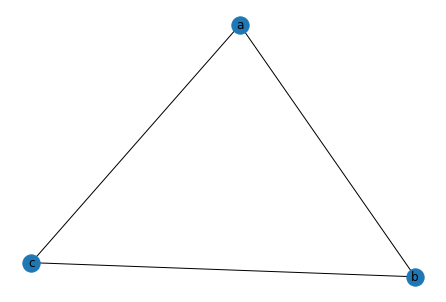

In [3]:
g = nx.Graph()

g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")

nx.draw(g ,with_labels=True)

Nodes and edges can also be easly removed

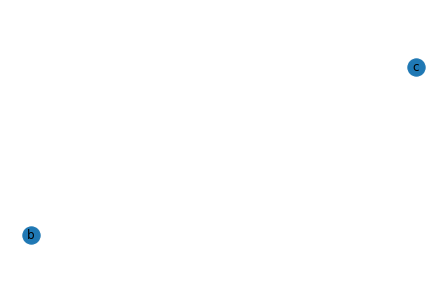

In [4]:
g.remove_node("a")
g.remove_edge("b", "c")

#re-draw the graph
nx.draw(g, with_labels=True)

## Reading a graph from file
``networkx`` natively supports several network file formats.

Among them one the most frequently used in online repository is the *edgelist* one.

An edge list is a text file (usually saved as .csv) in which each line identifies an edge. <br/>
For instance, the triangle defined before can be described as:

    a,b
    b,c
    c,a

To read edgelist file just write

In [5]:
g = nx.read_edgelist("data/network.csv", delimiter=",", nodetype=int)

Similarly a graph can be written to file using ``nx.write_edgelist(g, filename)``.

For all the I/O methods refer to the [official documentation](https://networkx.github.io/documentation/latest/reference/readwrite/index.html)

## Accessing nodes and edges
Given a ``Graph`` object is it possible to iterate over its nodes with a simple ``for`` loop

In [6]:
for n in g.nodes():
    # do something
    pass

Following a similar rationale is it also possible to loop over the edge set

In [7]:
for e in g.edges():
    # do something
    pass

All graph entities can be used to store additional attributes (weights, labels...). 

For furhter details refer to the [official documentation](https://networkx.github.io/documentation/latest/tutorial.html#adding-attributes-to-graphs-nodes-and-edges)

## Network base statistics
``networkx`` allows to manipulate nodes as well as edges, count them, and extract relevant global features.

In [8]:
g.number_of_nodes()

2566

In [9]:
g.number_of_edges()

8593

In [10]:
g.number_of_selfloops()

0

In [11]:
g.is_directed()

False

## Centrality measures
Node centrality measures can be easily computed as follows

In [12]:
g.degree(nbunch=[0,1,2]) # compute the degree of a set of nodes (if specified).

DegreeView({0: 5, 1: 24, 2: 55})

In [13]:
nx.closeness_centrality(g)[0] # compute the closeness centraliry of all nodes (and access the value of node 0)

0.2262227055542501

In [14]:
nx.betweenness_centrality(g)[0] # compute the betweenness centraliry of all nodes (and access the value of node 0)

3.104347235549552e-05

In [15]:
nx.harmonic_centrality(g)[0]

652.6834776334922

In [16]:
nx.pagerank(g)[0]

0.0002170705922274007

In [17]:
nx.eigenvector_centrality(g)[0]

0.006863665432818066

## Triangles, density and clustering
Other indexes that can be computed using the library are 

In [18]:
nx.density(g)

0.002611143776996835

In [19]:
nx.triangles(g)[0] # count the triangles each node is involved in (and access the value of node 0)

4

In [20]:
nx.clustering(g)[0] # compute the local clustering coefficient for all nodes (and access the value for node 0)

0.4

In [21]:
nx.average_clustering(g) # compute the global clustering coefficient

0.20063633264589634

## Graph filtering
``networkx`` allows to select node specific views of the original graph

In [22]:
list(g.neighbors(0)) # obtain the list of neighobors for node 0

[306, 830, 1599, 273, 1988]

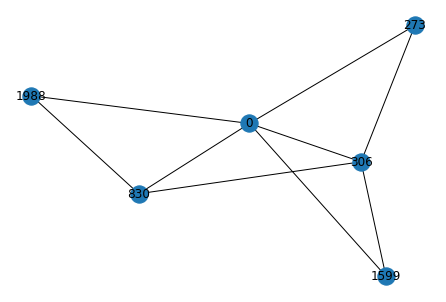

In [23]:
ego = nx.ego_graph(g, 0) # ego network of the node 0
nx.draw(ego, with_labels=True)

Using the same rationale also connected components can be extracted

In [24]:
nx.number_connected_components(g)

85

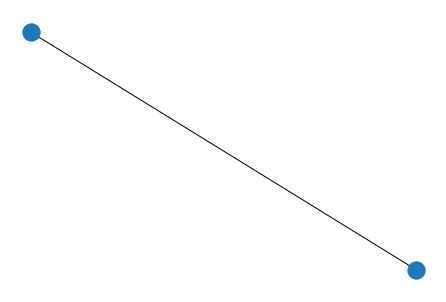

In [25]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
nx.draw(comp_1)

## Paths and Diameter
Shortest paths can extracted as well using the following syntax

In [26]:
nx.shortest_path(g, source=0, target=30)

[0, 306, 30]

In [27]:
nx.shortest_path_length(g, source=0, target=30)

2

Moreover, the network diameter can be computed as follows

In [28]:
nx.diameter(g.subgraph(comps[0])) # we compute the diameter on the giant component

17

## Degree distribution
An easy way to compute, and visualise, the degree distribution is the following

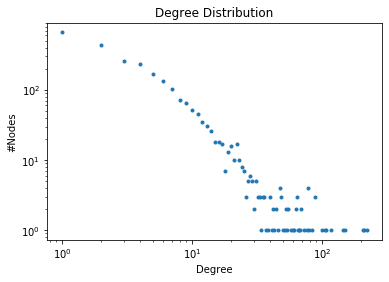

In [29]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

A more complete one instead is...

In [30]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

Calculating best minimal value for power law fit


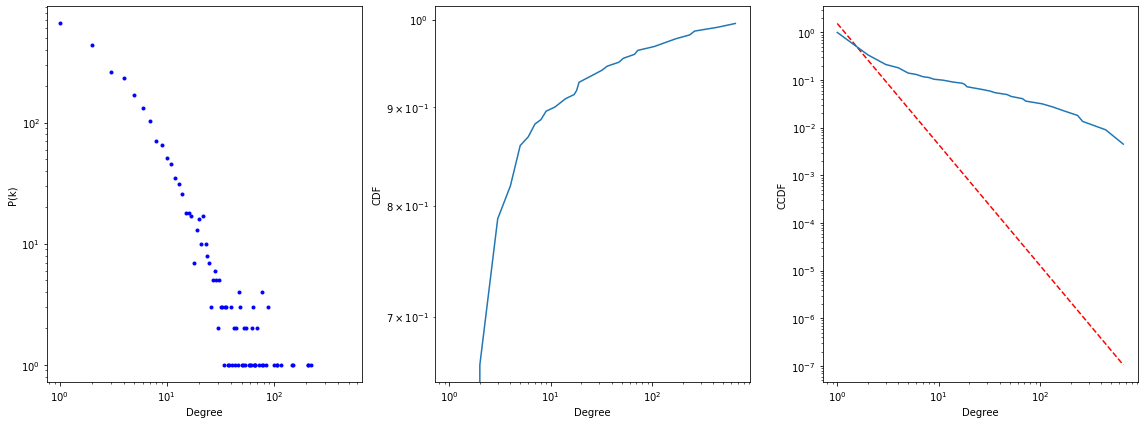

alpha=3.541816377727632 sigma=0.10371379306353201


In [31]:
plot_dist(g)

## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

### Erdos-Renyi (random) graphs

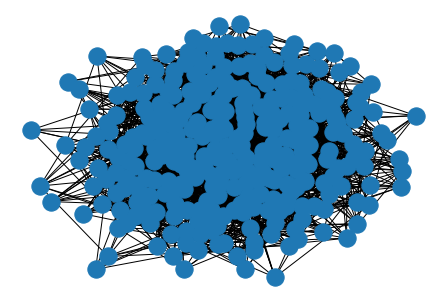

In [32]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(300, 0.05)
nx.draw(er)

ER degree distribution

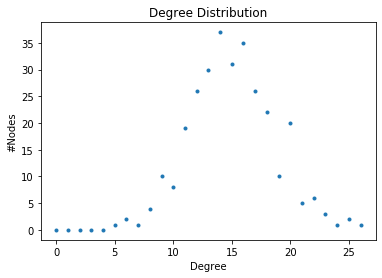

In [33]:
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

### Watts-Strogatz (small world) graphs

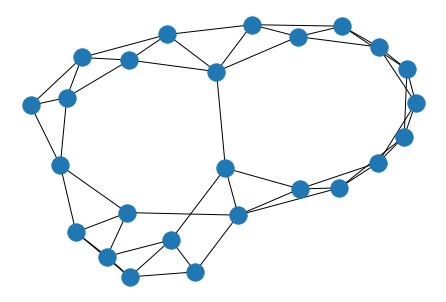

In [34]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(25, k=4, p=0.1)
nx.draw(ws)

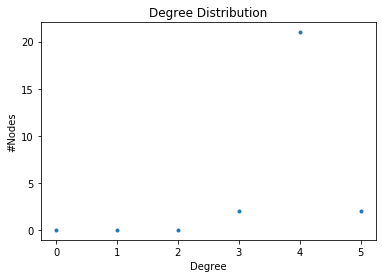

In [35]:
hist = nx.degree_histogram(ws)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

### Barabasi-Albert (scale-free) graphs

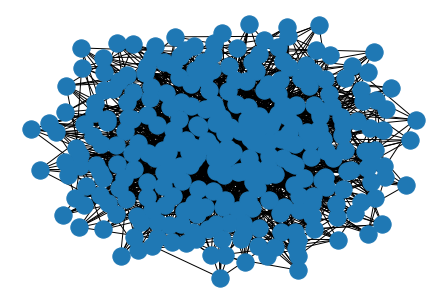

In [36]:
# network generators 3 (preferential attachment)
m = 7
ba = nx.barabasi_albert_graph(300, m)
nx.draw(ba)

BA degree distribution

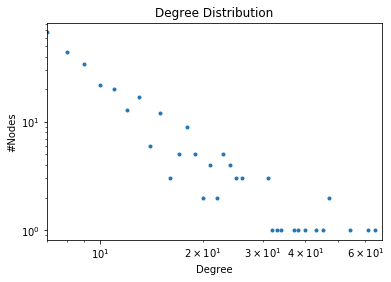

In [37]:
hist = nx.degree_histogram(ba)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.xlim((m, max(hist)))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

Calculating best minimal value for power law fit


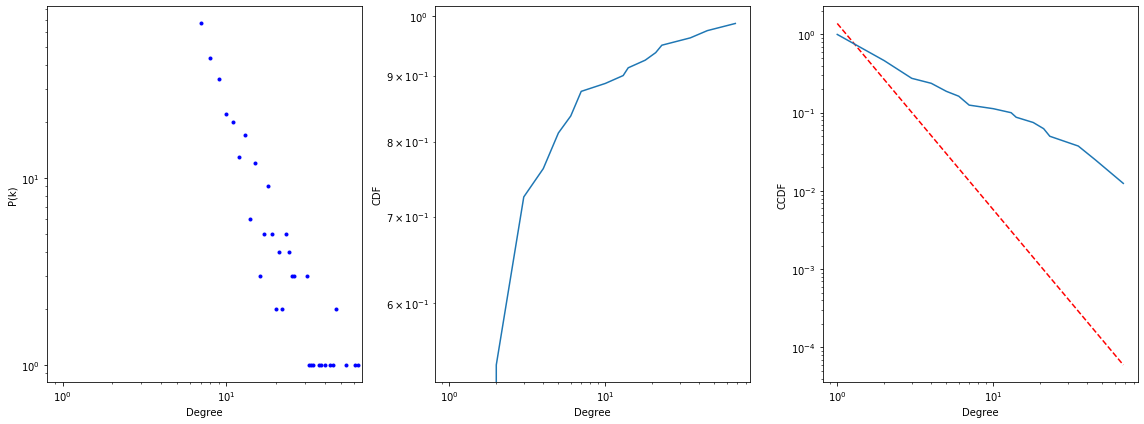

alpha=3.380815318094191 sigma=0.15437984578158032


In [38]:
plot_dist(ba)

### Configuration Model

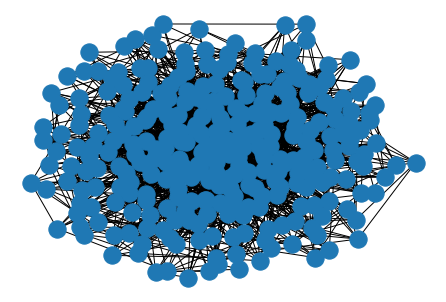

In [39]:
# fitting the degree distribution of the previous BA example
sequence = [i[1] for i in ba.degree()]

cm = nx.configuration_model(sequence)
nx.draw(cm)

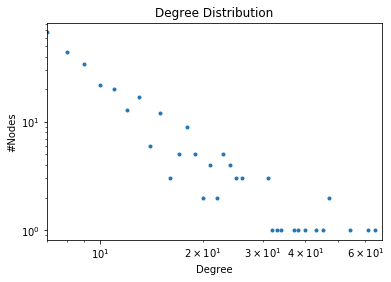

In [40]:
hist = nx.degree_histogram(cm)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.xlim((m, max(hist)))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

Calculating best minimal value for power law fit


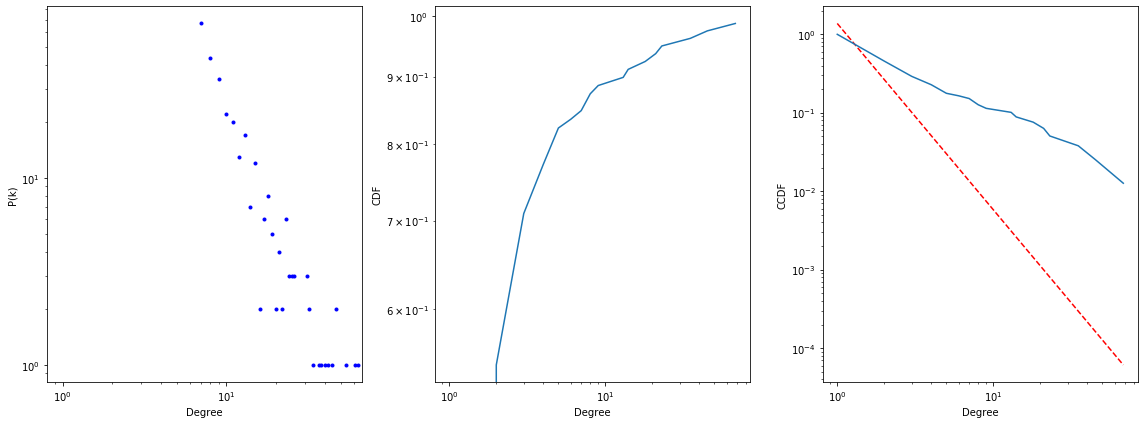

alpha=3.3745166501794084 sigma=0.15464520527382206


In [41]:
plot_dist(cm)